Requirements:
- [x] Grovers Search
- [x] 3 or more qubits
- [x] Write code for "user defined" unitary Uf
- [x] Add appropriate number of iterations
- [x] Run several times, observe proababilities
- [x] Returns "searched for " item

In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.circuit import Gate
from qiskit.tools.visualization import plot_histogram
import math

In [3]:
# Ut is the oracle


# Uf is the function applied in the oracle and supplied by user
def Uf_oracle_example_MCT(n, input):
  # does function f on one additional qubit
  uf = QuantumCircuit(n+1, 0)
  for idx,i in enumerate(input):
    if i == 0:
      uf.x(idx)
  uf.mct(list(range(0,n)),n)
  for idx,i in enumerate(input):
    if i == 0:
      uf.x(idx)
  ufg = uf.to_instruction()
  ufg.name = '$U_f$'
  return ufg

In [4]:
def Us(n):
  us = QuantumCircuit(n, 0)
  for i in range(0,n):
    us.h(i)
  for i in range(0,n):
    us.x(i)
  us.h(n-1)
  us.mct( list(range(0,n-1)) ,n-1)
  us.h(n-1)
  for i in range(0,n):
    us.x(i)
  for i in range(0,n):
    us.h(i)
  usg = us.to_gate()
  usg.name = '$U_s$'
  return usg

In [5]:
def checkBitS(bitS):
  validInput = True
  bitArr = []
  # convert string to int array
  for i in bitS:
    if i == "1":
      bitArr.append(1)
    elif i == "0":
      bitArr.append(0)
    else:
      print("Non-bit detected - please try again: ")
      validInput = False
      break
  return bitArr, validInput

Bit sequence to search for: (example - 101):   111
Searching for:  [1, 1, 1]
number of qubits needed:  3
Results: {'0110': 8, '0001': 5, '0100': 8, '0101': 7, '0010': 3, '0000': 13, '0011': 9, '0111': 971}


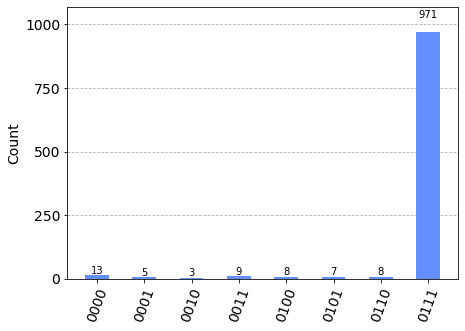

In [14]:
validInput = False

while validInput==False:
  bitS = input("Bit sequence to search for: (example - 101):   ")
  bitArr, validInput = checkBitS(bitS)
# Number of needed qubits
n = len(bitArr)

print("Searching for: ",bitArr)
print("number of qubits needed: ",n)


# n=3
# input = [0,1,1]
numIter = math.floor(math.pi / 4 * math.sqrt(2**n))
# numIter = 2
qr = QuantumRegister(n+1, 'q')
createKetS = QuantumCircuit(qr)
for i in range(0,n):
  createKetS.h(i)
createKetS.barrier()
# createKetS.draw()

for i in range(numIter):
  #single iteration
  # uf_gate = Gate(name='$U_f$', num_qubits=n+1, params=[])
  uf_gate = Uf_oracle_example_MCT(n, bitArr)
  createKetS.x(n)
  createKetS.h(n)

  createKetS.append(uf_gate, list(range(0,n+1)))

  createKetS.h(n)
  createKetS.x(n)
  createKetS.barrier()

  # ut_gate=Ut(n,uf_gate) #uf_gate supplied by user
  # createKetS.append(ut_gate, list(range(0,n+1)))
  us_gate = Us(n);
  createKetS.append(us_gate, list(range(0,n)))
  createKetS.barrier(); 
  #end of single iteration


createKetS.measure_all()

# Run the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(createKetS, backend=simulator, shots=1024).result()

# Print the results
counts = result.get_counts(createKetS)
print("Results:", counts)

# Plot the results
plot_histogram(counts)

# createKetS.draw()

Probabilities with search iterations over 1024 shots.

|     Search/Prob.     | 000 | 001 | 010 | 011 | 100 | 101 | 110 | 111 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 000 | 978 | 5 | 11 | 3 | 7 | 10 | 3 | 7 |
| 001 | 7 | 10 | 10 | 12 | 953 | 10 | 8 | 14 |
| 010 | 10 | 5 | 966 | 12 | 6 | 6 | 8 | 11 |
| 011 | 12 | 10 | 12 | 3 | 7 | 12 | 962 | 6 |
| 100 | 12 | 970 | 9 | 6 | 6 | 7 | 8 | 6 |
| 101 | 14 | 5 | 8 | 5 | 6 | 974 | 6 | 6 |
| 110 | 14 | 8 | 11 | 967 | 7 | 7 | 5 | 5 |
| 111 | 13 | 5 | 3 | 9 | 8 | 7 | 8 | 971 |

